In [4]:
# Task 1.1 Calculate the Clock Granularity of different Python Timers (on your system)

# As part of the task measure and report the clock granularity (measured experimentally on your system) for 1) time.time(), 2) timeit and 3) time.time_ns() 
# (for the last one remember that time is outputted in ns!).

import numpy as np
import time
from timeit import default_timer as timer

def clock_granularity_time_time():
   M = 200
   timesfound = np.empty((M,))
   for i in range(M):
      t1 =  time.time()
      t2 = time.time()
      while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
          t2 = time.time()
      t1 = t2 # this is outside the loop
      timesfound[i] = t1 # record the time stamp
   minDelta = 1000000
   Delta = np.diff(timesfound) # it should be cast to int only when needed
   minDelta = Delta.min()
   return minDelta

def clock_granularity_timeit():
   M = 200
   timesfound = np.empty((M,))
   for i in range(M):
      t1 =  timer()
      t2 = timer()
      while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
          t2 = timer()
      t1 = t2 # this is outside the loop
      timesfound[i] = t1 # record the time stamp
   minDelta = 1000000
   Delta = np.diff(timesfound) # it should be cast to int only when needed
   minDelta = Delta.min()
   return minDelta


def clock_granularity_time_time_ns():
   M = 200
   timesfound = np.empty((M,))
   for i in range(M):
      t1 = time.time_ns()
      t2 = time.time_ns()
      while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
          t2 = time.time_ns()
      t1 = t2 # this is outside the loop
      timesfound[i] = t1 # record the time stamp
   minDelta = 1000000
   Delta = np.diff(timesfound) # it should be cast to int only when needed
   minDelta = Delta.min()
   return minDelta

granularity_time_time = clock_granularity_time_time()
granularity_timeit = clock_granularity_timeit()
granularity_time_time_ns = clock_granularity_time_time_ns() / 1_000_000_000
print("Results:")
print("time.time(): ", granularity_time_time)
print("timeit: ", granularity_timeit)
print("time.time_ns(): ", granularity_time_time_ns)

Results:
time.time():  7.152557373046875e-07
timeit:  2.71997123491019e-07
time.time_ns():  7.68e-07


*RESULTS OF "Task 1.1 Calculate the Clock Granularity of different Python Timers (on your system)"*

timeit timer has the lowest granularity value so has the best accuracy (lowest granularity)
This timer will be used for future timer readings.

In [12]:
# Task 1.2 Timing the Julia set code functions.

"""
The goal is to time the calc_pure_python and calculate_z_serial_purepython. 
We ask you to develop a decorator to wrap the functions to be profiled for this task. 
Use the decorator to add timer functionality for time measurements with the best timer you found in the previous task. 

As part of the task:
    - Develop the timer decorator 
    - Provide timing information for the two functions. Report averages and standard deviation. How does the standard deviation compare to the clock frequency?
"""

# ------------------------- JULIA CODE ----------------------------------------
"""Julia set generator without optional PIL-based image drawing"""
import time
import numpy as np
from functools import wraps
from timeit import default_timer as timer

# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

# decorator to time
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        timing = t2-t1
        if fn.__name__ == "calc_pure_python":
            calc_pure_python_timings.append(timing)
        else:
            calc_z_serial_timings.append(timing)
        return result
    return measure_time

@timefn
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function

    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    output = calculate_z_serial_purepython(max_iterations, zs, cs)

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    # assert sum(output) == 33219980

@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

if __name__ == "__main__":

    # Calculate the Julia set using a pure Python solution with
    # reasonable defaults for a laptop
    calc_pure_python_timings = []
    calc_z_serial_timings = []
    
    for i in range(100):
        calc_pure_python(desired_width=1000, max_iterations=300)
    
    calc_pure_python_timings = np.array(calc_pure_python_timings)
    calc_z_serial_timings = np.array(calc_z_serial_timings)

    calc_pure_python_mean = np.mean(calc_pure_python_timings)
    calc_z_serial_mean = np.mean(calc_z_serial_timings)

    calc_pure_python_std = np.std(calc_pure_python_timings)
    calc_z_serial_std = np.std(calc_z_serial_timings)

    print("calc pure: ", calc_pure_python_timings)
    print("calc_serial: ", calc_z_serial_timings)

    print("calc pure mean: ", calc_pure_python_mean)
    print("calc_serial mean: ", calc_z_serial_mean)

    print("calc pure std: ", calc_pure_python_std)
    print("calc_serial std: ", calc_z_serial_std)

# -------------------------------------------------------------------------------

calc pure:  [5.73729514 5.59987481 5.51063038 5.52781498 5.53533972 5.57189824
 5.55441605 5.51250214 5.52879615 5.65002869 5.54156556 5.56927887
 5.50615493 5.53036567 5.53631623 5.66116403 5.54480583 5.60283223
 5.51995312 5.58589959 5.54626112 5.53289091 5.55967677 5.40759956
 5.23331188 5.23349744 5.24298685 5.44564507 5.25410016 5.22157407
 5.26741835 5.25953966 5.46201951 5.40606325 5.34313499 5.34113988
 5.32067685 5.36091277 5.36471022 5.32173124 5.30809503 5.57126892
 5.4152904  5.37649315 5.29109072 5.23013328 5.26028234 5.93957188
 5.57499179 5.22969138 5.31367385 5.35106292 5.21713448 5.28549195
 5.22568881 5.22379026 5.19391415 5.20580148 5.17522171 5.22540996
 5.25878239 5.22849568 5.22167108 5.19931049 5.20444987 5.23216767
 5.18889117 5.28723774 5.17859771 5.22216556 5.24515272 5.22314985
 5.23476766 5.30867426 5.23281507 5.24812918 5.25524149 5.23001043
 5.19641327 5.26266599 5.89062352 5.51584934 5.40660886 5.41820796
 5.37414136 5.34283718 5.39634804 5.48408046 5.458

In [11]:
# Task 1.3 Profile the Julia set code with cProfile and line_profiler the computation

"""
Use the cProfile and line_profiler to profile the computation in JuliaSet code.

As part of the task:

     -  Report the results of cProfile and line_profiler (for the two functions)

     - Use SnakeViz to visualize the profiling information from cProfile

     - Measure the overhead added by using cProfile and line_profiler. For this, you can time the code with and without  the profilers 
"""

#---------- Profiling using cprofile ------------
#To print cProfile data in the terminal:
!python3 -m cProfile -s cumulative JuliaSet.py

#To have cProfile output performance statistics to a file:
!python3 -m cProfile -o profile.stats JuliaSet.py

#Then, we can either use the "readStats.py" file to sort and display the data in terminal:
!pip3 install pstats
!python3 readStats.py

#Or we can use snakeviz to visualise the data, which displays the data on a browser page
!pip3 install snakeviz
!python3 -m snakeviz profile.stats --server


#---------- Profiling using line profiler ------------
# By adding "@profile" in the line above the calc_pure_python and calculate_z_serial_purepython functions, we get data on the duration of each line within these functions
# We print this data to terminal by using the following two commands:
!pip3 install line_profiler
!python3 -m kernprof -l JuliaSet.py
!python3 -m line_profiler JuliaSet.py.lprof

# #---------- Measuring the overhead of using these two tools: ------------
# #The file JuliaSetTiming.py is identical to JuliaSet.py, but it also measures the time it takes to execute the calc_pure_python function
# #Without any tools:
!python3 JuliaSetTiming.py

#Using c profile tool:
!python3 -m cProfile -o profile.stats JuliaSetTiming.py

#Using line profiling tool: (we use JuliaSetTimingLineProfile because it also incudes the @profile wraps needed)
!python3 -m kernprof -l JuliaSetTimingLineProfile.py



function took this long: 
0.015052564005600289
function took this long: 
0.029500602002372034
function took this long: 
0.18378327699610963
Wrote profile results to JuliaSetTimingLineProfile.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "JuliaSetTimingLineProfile.py.lprof"


In [13]:
#Task 1.4 Memory-profile the Juliaset code. Use the memory_profiler and mprof to profile the computation in JuliaSet code
"""
Use memory_profiler to profile the memory usage for the two functions and use mprof to collect and visualize the profiling information.

As part of the task:

    - Report the memory profiling results from memory_profiler and mprof (including the plot)

    - Measure the overhead of memory_profiler and mprof.
"""
# !pip3 install memory_profiler
# !pip3 install psutil
#Add profile decorator before each function you want to analyse
!python3 -m kernprof -l JuliaSet.py
!python3 -m line_profiler -rmt JuliaSet.py.lprof

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 0.03782820701599121 seconds
Wrote profile results to JuliaSet.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "JuliaSet.py.lprof"
Timer unit: 1e-06 s

Total time: 0.0527 s
File: JuliaSet.py
Function: calc_pure_python at line 20

Line #      Hits         Time  Per Hit   % Time  Line Contents
    20                                           @profile
    21                                           def calc_pure_python(desired_width, max_iterations):
    22                                               """Create a list of complex coordinates (zs) and complex parameters (cs),
    23                                               build Julia set"""
    24         1          2.0      2.0      0.0      x_step = (x2 - x1) / desired_width
    25         1          1.0      1.0      0.0      y_step = (y1 - y2) / desired_width
    26         1          1.0      1.0      0.0      x = []
    27         1          

In [ ]:
#---------- 2.1 Profiling using cProfile ------------
#To print cProfile data in the terminal:
!python3 -m cProfile -s diffusion.py

#To have cProfile output performance statistics to a file:
!python3 -m cProfile -o profile.stats diffusion.py

#Then, we can either use the "readStats.py" file to sort and display the data in terminal:
!pip3 install pstats
!python3 readStats.py

#Or we can use snakeviz to visualise the data, which displays the data on a browser page
!pip3 install snakeviz
!python3 -m snakeviz profile.stats --server


#---------- Profiling using line profiler ------------
!pip3 install line_profiler
!python3 -m kernprof -l diffusion.py


In [ ]:
#--------- 2.2: Memory profiler ------------
!pip install memory_profiler
!pip install psutil
!python -m memory_profiler diffusion_smaller.py
!python -m mprof run diffusion.py
#The final command will output the results as a .dat-file. To display it, run the command in the next section, replacing the filename with the output#

In [ ]:
!python -m mprof plot mprofile_20240127154859

8
done


times:
[9.5367431640625e-07, 2.0204200744628906, 4.031941890716553, 6.046151876449585, 8.064610004425049, 10.079509019851685, 12.096094846725464, 14.108896017074585, 16.12724781036377, 18.14214587211609, 20.16099500656128, 22.17823886871338, 24.193235874176025]
core results:
[array([66.3, 50.5, 60. , 46.5, 51. , 56. , 52. , 62.4, 55. , 57.4, 72.3,
       63. , 68.3]), array([ 9.9,  2. ,  3. ,  2. ,  3. ,  3. ,  3.9,  5.9,  4. ,  3. , 15.8,
        6.9,  5. ]), array([61.4, 43.6, 45.5, 40.6, 37.6, 43. , 44. , 53. , 48. , 49.5, 67.3,
       47. , 65. ]), array([ 7.9,  3. ,  4. ,  2. ,  2. ,  3. ,  3.9,  5.9,  3. ,  3. , 17. ,
        5. ,  5. ]), array([62.7, 40. , 44.6, 40.6, 42. , 41.4, 40. , 51. , 49. , 47.5, 66. ,
       54. , 59.4]), array([ 7.9,  2.9,  2. ,  1. ,  2. ,  4. ,  3. ,  5. ,  3. ,  4. , 14.9,
        5.9,  5. ]), array([58.4, 44.6, 46.5, 34.7, 39.6, 41. , 44.1, 48. , 51.5, 44.6, 68.3,
       46.5, 62.4]), array([ 9.7,  2. ,  4. ,  1. ,  4. ,  3. ,  2. ,  7.9,  3.9,  4. 

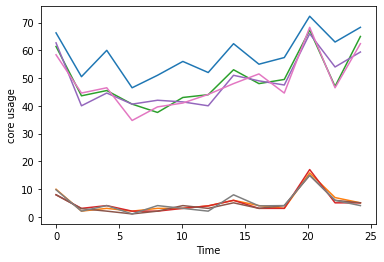

In [14]:
# BONUS - Develop your profiler tool for monitoring CPU percentage use with psutil
# Task 1.2 Timing the Julia set code functions.

"""
The goal is to time the calc_pure_python and calculate_z_serial_purepython. 
We ask you to develop a decorator to wrap the functions to be profiled for this task. 
Use the decorator to add timer functionality for time measurements with the best timer you found in the previous task. 

As part of the task:
    - Develop the timer decorator 
    - Provide timing information for the two functions. Report averages and standard deviation. How does the standard deviation compare to the clock frequency?
"""

# ------------------------- JULIA CODE ----------------------------------------
"""Julia set generator without optional PIL-based image drawing"""
import time
import psutil
import numpy as np
from functools import wraps
from timeit import default_timer as timer
import threading
import matplotlib.pyplot as plt 

# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193


def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function

    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    output = calculate_z_serial_purepython(max_iterations, zs, cs)

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    # assert sum(output) == 33219980

def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output



num_cores = psutil.cpu_count()

def count_cpu_usage():
    results = []
    times = []
    start_time = time.time()
    while function_active:
        current_time = time.time()-start_time
        x = psutil.cpu_percent(interval=1, percpu=True)
        times.append(current_time)
        results.append(x)
        time.sleep(1)
    results = np.array(results)
    print("times:")
    print(times)
    core_results = [results[:, i] for i in range(results.shape[1])]
    print("core results:")
    print(core_results)
    for i, core_result in enumerate(core_results):
        label = "core  " + str(i)
        plt.plot(times, core_result, label=label)
    plt.xlabel('Time')
    plt.ylabel('core usage')
    plt.show()


function_active = True
t = threading.Thread(target=count_cpu_usage)
t.start()
calc_pure_python(desired_width=2000, max_iterations=300)
function_active = False
print("done")




# -------------------------------------------------------------------------------